# week 5
## convolutional neural networks CNN
### part 1: implement the bacis CNN framework like tensorflow or pytorch

In [1]:
import numpy as np
import tensorflow as tf
# import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_moons

In [2]:
# Step 1: Generate a simple classification dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
y = y.reshape(-1, 1) # Reshape for OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y) # One-hot encode labels

scaler = StandardScaler()
X = scaler.fit_transform(X) # Standardize features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Step 2: Define a basic CNN model
def build_cnn():
  model = tf.keras.Sequential([
    tf.keras.layers.Reshape((2, 1), input_shape=(2,)), # Reshape for Conv1D
    tf.keras.layers.Conv1D(16, kernel_size=1, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
  ])

 
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
         loss="categorical_crossentropy",
         metrics=["accuracy"])
  return model

In [4]:
# Step 3: Train and evaluate the CNN
cnn_model = build_cnn()
history = cnn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
25/25 [==============================] - 0s 5ms/step - loss: 0.4106 - accuracy: 0.8325 - val_loss: 0.3009 - val_accuracy: 0.8600
Epoch 2/50
25/25 [==============================] - 0s 704us/step - loss: 0.2550 - accuracy: 0.8775 - val_loss: 0.2435 - val_accuracy: 0.8800
Epoch 3/50
25/25 [==============================] - 0s 646us/step - loss: 0.2083 - accuracy: 0.9050 - val_loss: 0.2232 - val_accuracy: 0.8800
Epoch 4/50
25/25 [==============================] - 0s 642us/step - loss: 0.1646 - accuracy: 0.9350 - val_loss: 0.1525 - val_accuracy: 0.9500
Epoch 5/50
25/25 [==============================] - 0s 633us/step - loss: 0.1262 - accuracy: 0.9550 - val_loss: 0.1334 - val_accuracy: 0.9600
Epoch 6/50
25/25 [==============================] - 0s 648us/step - loss: 0.0963 - accuracy: 0.9675 - val_loss: 0.1280 - val_accuracy: 0.9500
Epoch 7/50
25/25 [==============================] - 0s 638us/step - loss: 0.0773 - accuracy: 0.9725 - val_loss: 0.0572 - val_accuracy: 0.9900
Epoch 8/

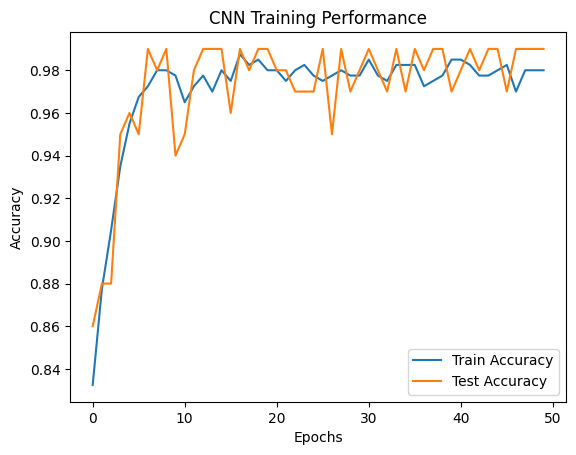

In [5]:
# Step 4: Plot training history
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("CNN Training Performance")
plt.legend()
plt.show()

In [6]:
# Step 5: Evaluate the final model
final_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)[1] * 100
print(f"Final Test Accuracy: {final_accuracy:.2f}%")

Final Test Accuracy: 99.00%
